# Feature Selection

We'll work with a dataset on sold houses in Ames, Iowa. Each row in the dataset describes the properties of a single house as well as the amount it was sold for. Here are some of the columns: 

- `Lot Area`: Lot size in square feet.
- `Overall Qual`: Rates the overall material and finish of the house.
- `Overall Cond`: Rates the overall condition of the house.
- `Year Built`: Original construction date.
- `Low Qual Fin SF`: Low quality finished square feet (all floors).
- `Full Bath`: Full bathrooms above grade.
- `Fireplaces`: Number of fireplaces.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

### Exploring and Cleaning the Data

In [2]:
data = pd.read_csv('AmesHousing.txt', delimiter="\t")

In [3]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
data.shape

(2930, 82)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [6]:
train = data[0:1460]
test = data[1460:]

In [7]:
train.shape

(1460, 82)

In [8]:
numerical_train = train.select_dtypes(include=['int64', 'float64'])

In [9]:
numerical_train.shape

(1460, 39)

In [10]:
cols_to_drop = ['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold']
numerical_train = numerical_train.drop(cols_to_drop, axis=1)

In [11]:
numerical_train.shape

(1460, 33)

In [12]:
null_series = numerical_train.isnull().sum()
null_series

Order                0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64

In [13]:
full_cols_series = null_series[null_series == 0]

In [14]:
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

In [15]:
len(full_cols_series)

25

### Finding the correlation between feature columns and the target column

In [16]:
train_subset = train[full_cols_series.index]
train_subset.head()

,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,1,20,31770,6,5,1656,0,0,1656,1,...,2.0,528.0,210,62,0,0,0,0,0,215000
1,2,20,11622,5,6,896,0,0,896,1,...,1.0,730.0,140,0,0,0,120,0,0,105000
2,3,20,14267,6,6,1329,0,0,1329,1,...,1.0,312.0,393,36,0,0,0,0,12500,172000
3,4,20,11160,7,5,2110,0,0,2110,2,...,2.0,522.0,0,0,0,0,0,0,0,244000
4,5,60,13830,5,5,928,701,0,1629,2,...,2.0,482.0,212,34,0,0,0,0,0,189900


In [17]:
correlation_matrix = train_subset.corr()
sorted_corrs = correlation_matrix['SalePrice'].abs().sort_values()
sorted_corrs

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

### Correlation Matrix Heatmap

In [18]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
strong_corrs 

Wood Deck SF     0.319104
Open Porch SF    0.344383
TotRms AbvGrd    0.483701
Fireplaces       0.485683
Full Bath        0.518194
1st Flr SF       0.657119
Garage Area      0.662397
Garage Cars      0.663485
Gr Liv Area      0.698990
Overall Qual     0.804562
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [19]:
correlation_matrix = train_subset[strong_corrs.index].corr()

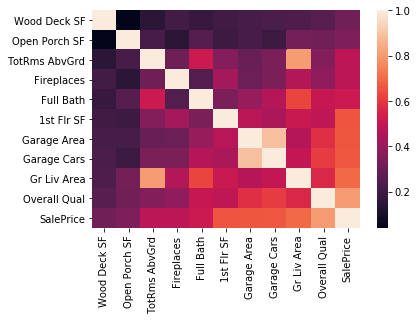

In [20]:
sns.heatmap(correlation_matrix)
plt.show()

Gr Liv Area is strongly correlated with TotRms AbvGrd.

Garage Area is strongly correlated with Garage Cars.

### Training and testing the model

In [21]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'

clean_test = test[final_corr_cols.index].dropna()
clean_test.head()

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice
1460,168,116,1,2,1366,725.0,1947,9,274000
1461,182,35,1,2,1786,715.0,1786,8,300000
1462,0,0,1,2,1149,779.0,2290,8,255900
1463,0,63,0,2,884,543.0,1768,7,224900
1464,0,57,1,2,1129,596.0,2327,7,240000


In [22]:
test[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB


In [23]:
# Building a linear regression model

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Calculating the RMSE on the test and train sets

train_pred = lr.predict(train[features])
test_pred = lr.predict(clean_test[features])

train_rmse = np.sqrt(mean_squared_error(train_pred, train[target]))
print(train_rmse)
test_rmse = np.sqrt(mean_squared_error(test_pred, clean_test[target]))
print(test_rmse)

34173.97629185851
41032.026120197705


### Removing features with low variance

In [25]:
train_rescaled = (train[features] - train[features].min())/(train[features].max() - train[features].min())

In [26]:
train_rescaled.min()

Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
dtype: float64

In [27]:
train_rescaled.max()

Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
dtype: float64

In [28]:
sorted_vars = train_rescaled.var().sort_values()
sorted_vars

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64

### Final Model after Feature Selection

In [29]:
final_test = test[final_corr_cols.index].dropna()
features = features.drop('Open Porch SF')

In [30]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
train_pred = lr.predict(train[features])
test_pred = lr.predict(final_test[features])

In [32]:
train_rmse = np.sqrt(mean_squared_error(train_pred, train[target]))
print(train_rmse)
test_rmse = np.sqrt(mean_squared_error(test_pred, clean_test[target]))
print(test_rmse)

34372.696707783965
40591.427024377204
